
mdata
7713546880.658698
merrdata
2.0642242706278945e-07
qdata
-7.455315558351289e-16
qerrdata
1.375511734235587e-16


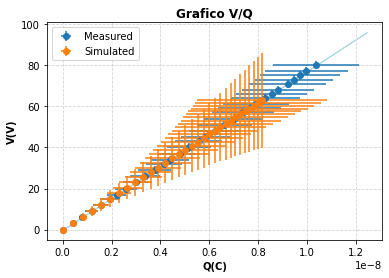

m
[2.77848927]
merr
[0.01999739]


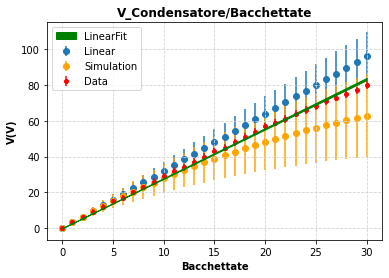

In [1]:
#generatore attaccato alla sfera 1000VDC, bacchettata alla sfera
#attaccare l'elettrometro al condensatore e dargli la bacchettata

#condensatore a d = 5mm (errore Ce proporzionale a Cc) e d=0.009<<sqrt(A)=0.15946

#1.6cm è quando si inizia a perdere l'approssimazione di faccie piane e parallele

#poi misurare V con l'elettrometro, ripetere le misure con altre bacchettate
#toccando sempre sfera e condensatore nello stesso punto



#SET 1

import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt

eps0 = 8.859E-12

Dc = 0.178
Dcerr = 0.0005
#Dc = Dc-np.random.normal(0, Dcerr, 1)
#Dc = 

A = np.pi/4*Dc**2
A_err = A*2*Dcerr/Dc

D1 = 0.09945
D2 = 0.14575
D2 = 0.1492

D1err = 0.0001
D2err = 0.003
L = 0.1554
Lerr = 0.0001


b = eps0*A
berr = b*A_err/A

d = 0.006
derr= 0.001

Cc = b/d
Ccerr = Cc*((A_err/A)**2+(derr/d)**2)**(1/2)


Ce = 27e-12
Ce = 0.929e-10
Ce_err = 0

DBacchetta = 0.0320
DBerr = 0.0001
SBacchetta = np.pi/4*DBacchetta**2
SBacchettaerr = SBacchetta*2*DBerr/DBacchetta

Vec = np.array([0.000001,3.2,6.2,9.2,12,15,17,20,23,26,29,32,34,37,40,43,45,48,51,54,57,59,61,64,66,68,71,73,75,77,80])
#commentare
Vecerr = np.ones(len(Vec))
for i in range(len(Vecerr)):
	Vecerr[i] = 2
	if(Vec[i]<25):
		Vecerr[i] = 1.3
		if(Vec[i]<8):
			Vecerr[i] = 0.2
		if(Vec[i]<2.5):
			Vecerr[i] = 0.13



Q = Vec*(Cc+Ce)

CcCe_err = ((Ccerr)**2+Ce_err**2)**(1/2)
Qerr = Q*((Ccerr/(Cc))**2+(Vecerr/Vec)**2)**(1/2)
#Vec = np.array([])
#Vecerr = np.array([])

QBacchetta = Q[1]*(SBacchetta+A)/A
QBacchettaerr = QBacchetta*((Qerr[1]/Q[1])**2+(SBacchettaerr/SBacchetta)**2+(A_err/A)**2)**(1/2)

Qsimulation = np.zeros(len(Vec))
Vesimulation = np.zeros(len(Vec))
Qsimulationerr = np.zeros(len(Vec))
Vesimulationerr = np.zeros(len(Vec))
for i in range(1,len(Vec)):
	Qsimulation[i] = (Qsimulation[i-1]+QBacchetta)*A/(A+SBacchetta)
	Qsimulationerr[i] = Qsimulation[i]*((Qsimulationerr[i-1]+QBacchettaerr)/(Qsimulation[i-1]+QBacchetta)+(A_err/A)+(A_err+SBacchettaerr)/(A+SBacchetta))
	Vesimulation[i] = Qsimulation[i]/(Cc+Ce)

for i in range(len(Vesimulation)):
	Vesimulationerr[i] = 2
	if(Vesimulation[i]<25):
		Vesimulationerr[i] = 1.3
		if(Vesimulation[i]<8):
			Vesimulationerr[i] = 0.3
		if(Vesimulation[i]<2.5):
			Vesimulationerr[i] = 0.13
	if(i!=0):
		Vesimulationerr[i] = Vesimulation[i]*((Qsimulationerr[i]/Qsimulation[i])**2+(Ccerr/Cc)**2)**(1/2)



#V/Q

fig = plt.figure()
ax = fig.gca()
plt.title("Grafico V/Q",fontweight="bold")
plt.xlabel("Q(C)",fontweight="bold")
plt.ylabel("V(V)",fontweight="bold")

plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.errorbar(Q, Vec, yerr=Vecerr, xerr=Qerr, fmt='o',label="Measured")
plt.errorbar(Qsimulation, Vesimulation, yerr=Vesimulationerr, xerr=Qsimulationerr, fmt='o',label="Simulated")

fit,cov = np.polyfit(Q,Vec, 1,w = 1/Vecerr,cov="True")
merr,qerr = np.sqrt(np.diag(cov))
m,q = fit
deltaYtot = (Vecerr**2+(m*Qerr)**2)**(1/2)
fit,cov = np.polyfit(Q,Vec, 1,w = 1/deltaYtot,cov="True")
merr,qerr = np.sqrt(np.diag(cov))
m,q = fit

print("\nmdata")
print(m)
print("merrdata")
print(merr)
print("qdata")
print(q)
print("qerrdata")
print(qerr)

x = np.linspace(min(Q),max(Q)*1.2,1000)
y = q + m*x 
y_erroreMin = (q-qerr) + (m-merr)*x
y_erroreMax = (q+qerr) + (m+merr)*x

plt.fill_between(x,y_erroreMin,y_erroreMax, color="lightblue",zorder=1)



plt.legend(loc="upper left")
plt.show()


#GRAFICO V/Bacchettate

Bacchettate = np.arange(0,len(Vec),1)
Bacchettatedata = np.arange(0,len(Q),1)

QLinear = (Ce+Cc)*Vec[1]*Bacchettate

VLinear = QLinear/(Ce+Cc)
VLinearerr = np.ones(len(VLinear))
for i in range(len(VLinear)):
	if(i!=0):
		VLinearerr[i] = VLinear[i]*Qerr[i]/QLinear[i]
#VLinearerr = VLinear*Qerr/QLinear

def func(x, A):
  return (A*x)

popt, pcov = scipy.optimize.curve_fit(func, Bacchettatedata, Vec,sigma=Vecerr)

#merr,qerr = np.sqrt(np.diag(cov))
merr = np.sqrt(np.diag(pcov))
#m,q = fit
m = popt

print("m")
print(m)
print("merr")
print(merr)
#print("q")
#print(q)
#print("qerr")
#print(qerr)
q = qerr = 0


x = np.linspace(min(Bacchettatedata),max(Bacchettatedata),1000)
y = q + m*x 
y_erroreMin = (q-qerr) + (m-merr)*x
y_erroreMax = (q+qerr) + (m+merr)*x



fig = plt.figure()
ax = fig.gca()
plt.title("V_Condensatore/Bacchettate",fontweight="bold")
plt.xlabel("Bacchettate",fontweight="bold")
plt.ylabel("V(V)",fontweight="bold")

plt.grid(color='lightgray',linestyle="--",zorder=0)


plt.fill_between(x,y_erroreMin,y_erroreMax, color="green", label="LinearFit", zorder = 11)
plt.errorbar(Bacchettate, VLinear, yerr=VLinearerr, fmt='o',label="Linear", zorder = 1)

plt.errorbar(Bacchettatedata,Vesimulation, yerr=Vesimulationerr ,color = 'orange', fmt='o',label="Simulation", zorder = 1)
plt.errorbar(Bacchettatedata,Vec, yerr=Vecerr ,color = 'red', fmt='o',label="Data", zorder = 10, markersize=4)
#plt.plot(np.linspace(0,len(Vec),1000),np.ones(1000)*QBacchetta*A/SBacchetta/(Cc+Ce),color = 'red')
plt.legend(loc="upper left")
plt.show()









mdata
15688231893.826567
merrdata
4.3267114550476863e-07
qdata
1.6955874660088425e-15
qerrdata
1.0016868759714065e-16


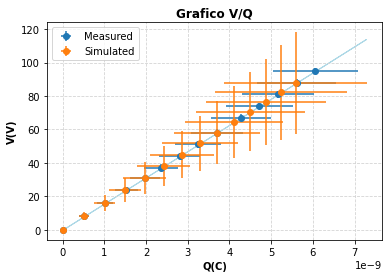

m
[7.37866497]
merr
[0.04371523]


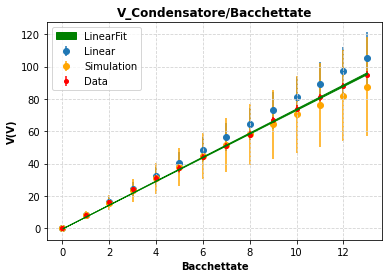

In [ ]:
#generatore attaccato alla sfera 1000VDC, bacchettata alla sfera
#attaccare l'elettrometro al condensatore e dargli la bacchettata

#condensatore a d = 5mm (errore Ce proporzionale a Cc) e d=0.009<<sqrt(A)=0.15946

#1.6cm è quando si inizia a perdere l'approssimazione di faccie piane e parallele

#poi misurare V con l'elettrometro, ripetere le misure con altre bacchettate
#toccando sempre sfera e condensatore nello stesso punto


#SET 2

import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt

eps0 = 8.859E-12

Dc = 0.178
Dcerr = 0.0005
#Dc = Dc-np.random.normal(0, Dcerr, 1)
#Dc = 

A = np.pi/4*Dc**2
A_err = A*2*Dcerr/Dc

D1 = 0.09945
D2 = 0.14575
D2 = 0.1492

D1err = 0.0001
D2err = 0.003
L = 0.1554
Lerr = 0.0001

Ce = 27e-12
Ce = 1e-10
b = eps0*A
berr = b*A_err/A

d = 0.006
derr= 0.001

Cc = b/d
Ccerr = Cc*((A_err/A)**2+(derr/d)**2)**(1/2)

Ce = 2.7e-11
Ce_err = 0

DBacchetta = 0.0320
DBerr = 0.0001
SBacchetta = np.pi/4*DBacchetta**2
SBacchettaerr = SBacchetta*2*DBerr/DBacchetta

Vec = np.array([0.1, 8.1, 16, 24, 31, 37, 44, 51, 58, 67, 74, 81, 88, 95])
#commentare
Vecerr = np.ones(len(Vec))
for i in range(len(Vecerr)):
	Vecerr[i] = 2
	if(Vec[i]<25):
		Vecerr[i] = 1.3
		if(Vec[i]<8):
			Vecerr[i] = 0.2
		if(Vec[i]<2.5):
			Vecerr[i] = 0.13



Q = Vec*(Cc+Ce)

CcCe_err = ((Ccerr)**2+Ce_err**2)**(1/2)
Qerr = Q*((Ccerr/(Cc))**2+(Vecerr/Vec)**2)**(1/2)
#Vec = np.array([])
#Vecerr = np.array([])

QBacchetta = Q[1]*(1+SBacchetta/A)
QBacchettaerr = QBacchetta*((Qerr[1]/Q[1])**2+(SBacchettaerr/SBacchetta)**2+(A_err/A)**2)**(1/2)

Qsimulation = np.zeros(len(Vec))
Vesimulation = np.zeros(len(Vec))
Qsimulationerr = np.zeros(len(Vec))
Vesimulationerr = np.zeros(len(Vec))
for i in range(1,len(Vec)):
	Qsimulation[i] = (Qsimulation[i-1]+QBacchetta)*A/(A+SBacchetta)
	Qsimulationerr[i] = Qsimulation[i]*((Qsimulationerr[i-1]+QBacchettaerr)/(Qsimulation[i-1]+QBacchetta)+(A_err/A)+(A_err+SBacchettaerr)/(A+SBacchetta))
	Vesimulation[i] = Qsimulation[i]/(Cc+Ce)

for i in range(len(Vesimulation)):
	Vesimulationerr[i] = 2
	if(Vesimulation[i]<25):
		Vesimulationerr[i] = 1.3
		if(Vesimulation[i]<8):
			Vesimulationerr[i] = 0.3
		if(Vesimulation[i]<2.5):
			Vesimulationerr[i] = 0.13
	if(i!=0):
		Vesimulationerr[i] = Vesimulation[i]*((Qsimulationerr[i]/Qsimulation[i])**2+(Ccerr/Cc)**2)**(1/2)



#V/Q

fig = plt.figure()
ax = fig.gca()
plt.title("Grafico V/Q",fontweight="bold")
plt.xlabel("Q(C)",fontweight="bold")
plt.ylabel("V(V)",fontweight="bold")

plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.errorbar(Q, Vec, yerr=Vecerr, xerr=Qerr, fmt='o',label="Measured")
plt.errorbar(Qsimulation, Vesimulation, yerr=Vesimulationerr, xerr=Qsimulationerr, fmt='o',label="Simulated")

fit,cov = np.polyfit(Q,Vec, 1,w = 1/Vecerr,cov="True")
merr,qerr = np.sqrt(np.diag(cov))
m,q = fit
deltaYtot = (Vecerr**2+(m*Qerr)**2)**(1/2)
fit,cov = np.polyfit(Q,Vec, 1,w = 1/deltaYtot,cov="True")
merr,qerr = np.sqrt(np.diag(cov))
m,q = fit

print("\nmdata")
print(m)
print("merrdata")
print(merr)
print("qdata")
print(q)
print("qerrdata")
print(qerr)

x = np.linspace(min(Q),max(Q)*1.2,1000)
y = q + m*x 
y_erroreMin = (q-qerr) + (m-merr)*x
y_erroreMax = (q+qerr) + (m+merr)*x

plt.fill_between(x,y_erroreMin,y_erroreMax, color="lightblue",zorder=1)



plt.legend(loc="upper left")
plt.show()


#GRAFICO V/Bacchettate

Bacchettate = np.arange(0,len(Vec),1)
Bacchettatedata = np.arange(0,len(Q),1)

QLinear = (Ce+Cc)*Vec[1]*Bacchettate
VLinear = QLinear/(Ce+Cc)
VLinearerr = np.ones(len(VLinear))
for i in range(len(VLinear)):
	if(i!=0):
		VLinearerr[i] = VLinear[i]*Qerr[i]/QLinear[i]
#VLinearerr = VLinear*Qerr/QLinear

def func(x, A):
  return (A*x)

popt, pcov = scipy.optimize.curve_fit(func, Bacchettatedata, Vec,sigma=Vecerr)

#merr,qerr = np.sqrt(np.diag(cov))
merr = np.sqrt(np.diag(pcov))
#m,q = fit
m = popt

print("m")
print(m)
print("merr")
print(merr)
#print("q")
#print(q)
#print("qerr")
#print(qerr)
q = qerr = 0


x = np.linspace(min(Bacchettatedata),max(Bacchettatedata),1000)
y = q + m*x 
y_erroreMin = (q-qerr) + (m-merr)*x
y_erroreMax = (q+qerr) + (m+merr)*x



fig = plt.figure()
ax = fig.gca()
plt.title("V_Condensatore/Bacchettate",fontweight="bold")
plt.xlabel("Bacchettate",fontweight="bold")
plt.ylabel("V(V)",fontweight="bold")

plt.grid(color='lightgray',linestyle="--",zorder=0)


plt.fill_between(x,y_erroreMin,y_erroreMax, color="green", label="LinearFit", zorder = 11)
plt.errorbar(Bacchettate, VLinear, yerr=VLinearerr, fmt='o',label="Linear", zorder = 1)

plt.errorbar(Bacchettatedata,Vesimulation, yerr=Vesimulationerr ,color = 'orange', fmt='o',label="Simulation", zorder = 1)
plt.errorbar(Bacchettatedata,Vec, yerr=Vecerr ,color = 'red', fmt='o',label="Data", zorder = 10, markersize=4)
#plt.plot(np.linspace(0,len(Vec),1000),np.ones(1000)*QBacchetta*A/SBacchetta/(Cc+Ce),color = 'red')
plt.legend(loc="upper left")
plt.show()